In [5]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import json



with open("credentials.json") as infile:
        auth = json.load(infile)
        client_id = auth["client_id"]
        client_secret = auth["client_secret"]

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [6]:
rap_urls = []
rap_ids = []

country_urls = []
country_ids = []

rock_urls = []
rock_ids = []

album_genres = []
blank = 0
for i in range(0,100,50):
    track_results = spotify.search(q='genre:rap', type='track', limit=50,offset=i)
    print(track_results)
    for i, item in enumerate(track_results["tracks"]["items"]):
        if item["album"]["album_type"] == "album":
            rap_ids.append(item["album"]["id"])
            rap_urls.append(item["album"]["images"][1]["url"])
        

for i in range(0,100,50):
    track_results = spotify.search(q='genre:rock', type='track', limit=50,offset=i)
    for i, item in enumerate(track_results["tracks"]["items"]):
        if item["album"]["album_type"] == "album":
            rock_ids.append(item["album"]["id"])
            rock_urls.append(item["album"]["images"][1]["url"])
        

for i in range(0,100,50):
    track_results = spotify.search(q='genre:country', type='track', limit=50,offset=i)
    for i, item in enumerate(track_results["tracks"]["items"]):
        if item["album"]["album_type"] == "album":
            country_ids.append(item["album"]["id"])
            country_urls.append(item["album"]["images"][1]["url"])


{'tracks': {'href': 'https://api.spotify.com/v1/search?query=genre%3Arap&type=track&offset=0&limit=50', 'items': [{'album': {'album_group': 'single', 'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4O15NlyKLIASxsJ0PrXPfz'}, 'href': 'https://api.spotify.com/v1/artists/4O15NlyKLIASxsJ0PrXPfz', 'id': '4O15NlyKLIASxsJ0PrXPfz', 'name': 'Lil Uzi Vert', 'type': 'artist', 'uri': 'spotify:artist:4O15NlyKLIASxsJ0PrXPfz'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'ET', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 

In [7]:
print(country_urls)
print(rap_urls)
print(rock_urls)

['https://i.scdn.co/image/ab67616d00001e02705079df9a25a28b452c1fc9', 'https://i.scdn.co/image/ab67616d00001e02705079df9a25a28b452c1fc9', 'https://i.scdn.co/image/ab67616d00001e027d6813fd233f3bc4977cceca', 'https://i.scdn.co/image/ab67616d00001e02705079df9a25a28b452c1fc9', 'https://i.scdn.co/image/ab67616d00001e02705079df9a25a28b452c1fc9', 'https://i.scdn.co/image/ab67616d00001e02705079df9a25a28b452c1fc9', 'https://i.scdn.co/image/ab67616d00001e02705079df9a25a28b452c1fc9', 'https://i.scdn.co/image/ab67616d00001e02705079df9a25a28b452c1fc9', 'https://i.scdn.co/image/ab67616d00001e02705079df9a25a28b452c1fc9', 'https://i.scdn.co/image/ab67616d00001e02f9f2dda2df2a695b9bad3440', 'https://i.scdn.co/image/ab67616d00001e02ca650d3a95022e0490434ba1', 'https://i.scdn.co/image/ab67616d00001e02705079df9a25a28b452c1fc9', 'https://i.scdn.co/image/ab67616d00001e02f9f2dda2df2a695b9bad3440', 'https://i.scdn.co/image/ab67616d00001e02705079df9a25a28b452c1fc9', 'https://i.scdn.co/image/ab67616d00001e02540fc1

In [8]:
from fastdownload import download_url
from fastai.vision.all import *
genres = ["country", "rap", "rock"]
path = Path("album_imgs")

dest = (path/genres[0])
dest.mkdir(exist_ok=True, parents=True)
download_images(dest, urls=country_urls[0:5])
    

In [9]:
dest = (path/genres[1])
dest.mkdir(exist_ok=True, parents=True)
download_images(dest, urls=rap_urls[0:5])

In [10]:
dest = (path/genres[2])
dest.mkdir(exist_ok=True, parents=True)
download_images(dest, urls=rock_urls[0:5])

In [15]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [27]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=5)


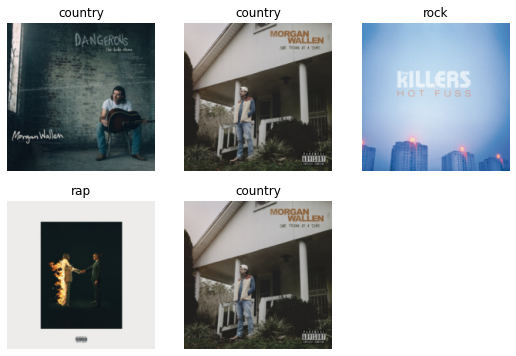

In [28]:
dls.show_batch()

In [29]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

z:\Anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
z:\Anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\foxis/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [33]:
is_country,_,probs = learn.predict("album1.jpg")
print(f"This is a: {is_country}.")
print(f"Probability it's country: {probs[0]:.4f}")

This is a: country.
Probability it's country: 0.9864


In [35]:
is_rap,_,probs = learn.predict("rap_test_2.jpg")
print(f"This is a: {is_rap}")
print(f"Probability it's rap: {probs[0]:.4f}")

This is a: rock
Probability it's rap: 0.1246
